## Part IIA Experiment
# 3A6 - Heat Transfer over CPU in a Raspberry Pi
This is minimal code for postprocessing your experimental data. You can plot the saved time data and select data at any timestamp for post processing. Contribution to the code repository is more than welcome.

## Import experiment data
The data generated in the experiment is saved as `.csv` file. This Python code will help you plot and export the data.

In [1]:
# entre the file name
file = '??' # Write your filename here
filename = './data/'+file+'.csv'

In [2]:
import pandas as pd
df = pd.read_csv(filename, sep=',', header=None)
exp_time = df [0]
cpu_temp = df [1]
ir_frame = df.loc[:, 2:769]
v2 = True
cpu_util = df [770]
fan_cycl = df [771]

## Selecting snapshot for plotting
The `.csv` file includes a timestamp counting from the start of experiment, the data is logged at an interval approximately 1 second, but can be delayed by program latency.

The code below allows you to preview the snapshot and take it to further post-processing.

**PLEASE RE-START THE NOTEBOOK IF IT FREEZES UP**

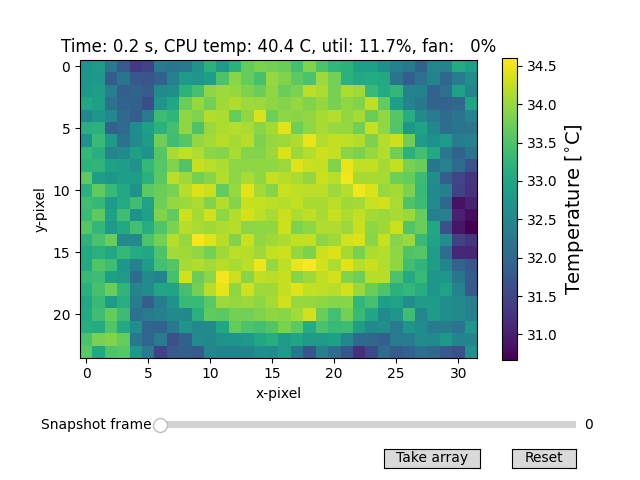

In [3]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

%matplotlib widget

# The parametrized function to be plotted
def data_array(row):
    ir_frame_n = ir_frame.loc[row,:].to_numpy()
    mlx_shape = (24,32)
    data_array = np.fliplr((np.reshape(ir_frame_n,mlx_shape))) # reshape to 24x32, and flip
    return data_array

# Define initial parameters
init_time = 0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
temp = ax.imshow(data_array(init_time),interpolation='none')
cbar = fig.colorbar(temp) # setup colorbar for temps
cbar.set_label('Temperature [$^{\circ}$C]',fontsize=14) # colorbar label
cbar.mappable.set_clim(vmin=data_array(init_time)[data_array(init_time)>0].min(),vmax=data_array(init_time).max())
ax.set_xlabel('x-pixel')
ax.set_ylabel('y-pixel')
if v2:
    ax.set_title('Time: {0:3.1f} s, CPU temp: {1:2.1f} C, util: {2:3.1f}%, fan: {3:3.0f}%'.format(exp_time[init_time],cpu_temp[init_time],cpu_util[init_time],fan_cycl[init_time]))
else:
    ax.set_title('Time = %.1f s' % exp_time[init_time])
    
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the frequency.
axSnap = fig.add_axes([0.25, 0.1, 0.65, 0.03])
snap_slider = Slider(
    ax=axSnap,
    label='Snapshot frame',
    valmin=0, valmax=len(exp_time), valstep = 1, valinit=init_time,
)

# The function to be called anytime a slider's value changes
def update(val):
    global snap,v2
    temp.set_data(data_array(val))
    cbar.mappable.set_clim(vmin=data_array(val)[data_array(val)>0].min(),vmax=data_array(val).max())
    if v2:
        ax.set_title('Time: {0:3.1f} s, CPU temp: {1:2.1f} C, util: {2:3.1f}%, fan: {3:3.0f}%'.format(exp_time[val],cpu_temp[val],cpu_util[val],fan_cycl[val]))
    else:
        ax.set_title('Time = %.1f s' % exp_time[val])
    snap = val
#     fig.canvas.draw_idle()

# register the update function with each slider
snap_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
buttonr = Button(resetax, 'Reset')
arraydax = fig.add_axes([0.6, 0.025, 0.15, 0.04])
buttonta = Button(arraydax, 'Take array')

def reset(event):
    snap_slider.reset()
buttonr.on_clicked(reset)

def take(event):
    global exp_time_n,cpu_temp_n,data_array_n,cpu_util_n,fan_cycl_n
    exp_time_n = exp_time.loc[snap]
    cpu_temp_n = cpu_temp.loc[snap]
    data_array_n = data_array(snap)
    if v2:
        cpu_util_n = 1
        fan_cycl_n = fan_cycl[snap]
buttonta.on_clicked(take)

plt.show()

You can drag the snapshot slider above to choose which snapshot to work with. Press 'Take array' when you selected a frame. The data will be stored in three arrays: 
* timestamp `exp_time_n`
* cpu sensor temp `cpu_temp_n`
* IR array `cpu_temp_n`

## Post-processing data
You can use the given code or write your own code to post-prosess the data.

In [ ]:
exp_time_n
cpu_temp_n
data_array_n
cpu_util_n
fan_cycl_n